# Sequential Models
## Vanilla Recurrent Neural Networks (RNNs)

All the neural architectures discussed in earlier chapters are inherently designed for multi-
dimensional data in which the attributes are largely independent of one another. However,
certain data types such as time-series, text, and biological data contain sequential depen-
dencies among the attributes. Examples of such dependencies are as follows:

- In a time-series data set, the values on successive time-stamps are closely related to one another. If one uses the values of these time-stamps as independent features, then key information about the relationships among the values of these time-stamps is lost. For example, the value of a time-series at time $t$ is closely related to its values in the previous window. However, this information is lost when the values at individual time-stamps are treated independently of one another.

- One can obtain better semantic insights when the ordering of the words is used. In such cases, it is important to construct models that take the sequencing information into account. Text data is the most common use case of recurrent neural networks.

- Biological data often contains sequences, in which the symbols might correspond to amino acids or one of the nucleobases that form the building blocks of DNA.

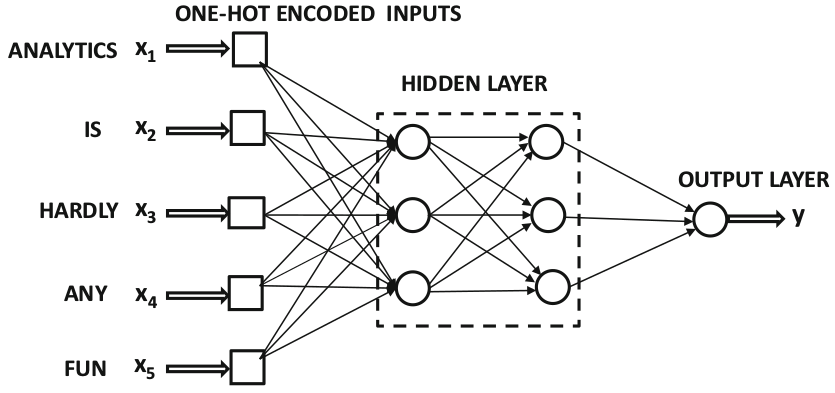

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/nnrnn.png",width=500, height=500)

An attempt to use a conventional neural network for sentiment analysis faces
the challenge of variable-length inputs. The network architecture also does not contain any
helpful information about sequential dependencies among successive words. Any sentence with less than five words would have missing inputs. *It is important to somehow
encode information about the word ordering more directly within the architecture of the network*. The goal of such an approach would be to reduce the parameter requirements
with increasing sequence length; recurrent neural networks provide an excellent example
of (parameter-wise) frugal architectural design with the help of domain-specific insights.

These desiderata are naturally satisfied with the use of recurrent neural networks
(RNNs). In a recurrent neural network, there is a one-to-one correspondence between the
layers in the network and the specific positions in the sequence. The position in the sequence
is also referred to as its *time-stamp*. Therefore, instead of a variable number of inputs in a
single input layer, the network contains a variable number of layers, and each layer has a
single input corresponding to that time-stamp.

Each layer uses the same set of parameters to ensure similar modeling at each time stamp, and
therefore the number of parameters is fixed as well. In other words, the same layer-wise
architecture is repeated in time, and therefore the network is referred to as recurrent. Re-
current neural networks are also feed-forward networks with a specific structure based on the
notion of time layering, so that they can take a sequence of inputs and produce a sequence
of outputs.

Some examples of applications include the following:

- The input might be a sequence of words, and the output might be the same sequence shifted by 1, so that we are predicting the next word at any given point. This is a classical **language model** in which we are trying the predict the next word based on the sequential history of words. Language models have a wide variety of applications in text mining and information retrieval.

- In a real-valued time-series, the problem of learning the next element is equivalent to **autoregressive analysis**. However, a recurrent neural network can learn far more complex models than those obtained with traditional time-series modeling.

- The input might be a sentence in one language, and the output might be a sentence in another language. In this case, one can hook up two recurrent neural networks to learn the translation models between the two languages. One can even hook up a recurrent network with a different type of network (e.g., convolutional neural network) to learn captions of images.

- The input might be a sequence (e.g., sentence), and the output might be a vector of class probabilities, which is triggered by the end of the sentence. This approach is useful for sentence-centric classification applications like **sentiment analysis**.

### Turing Completeness
Recurrent neural networks are known to be Turing complete. Turing completeness
means that a recurrent neural network can simulate any algorithm, given enough data and
computational resources. This property is, however, not very useful in practice because
the amount of data and computational resources required to achieve this goal in arbitrary
settings can be unrealistic.

### The Model

The focus of this week will be mostly on discrete RNNs, since that is the most
popular use case. Note that exactly the same neural network can be used both for building
a word-level RNN and a character-level RNN. The only difference between the two is the set
of base symbols used to define the sequence. For consistency, we will stick to the word-level
RNN while introducing the notations and definitions.


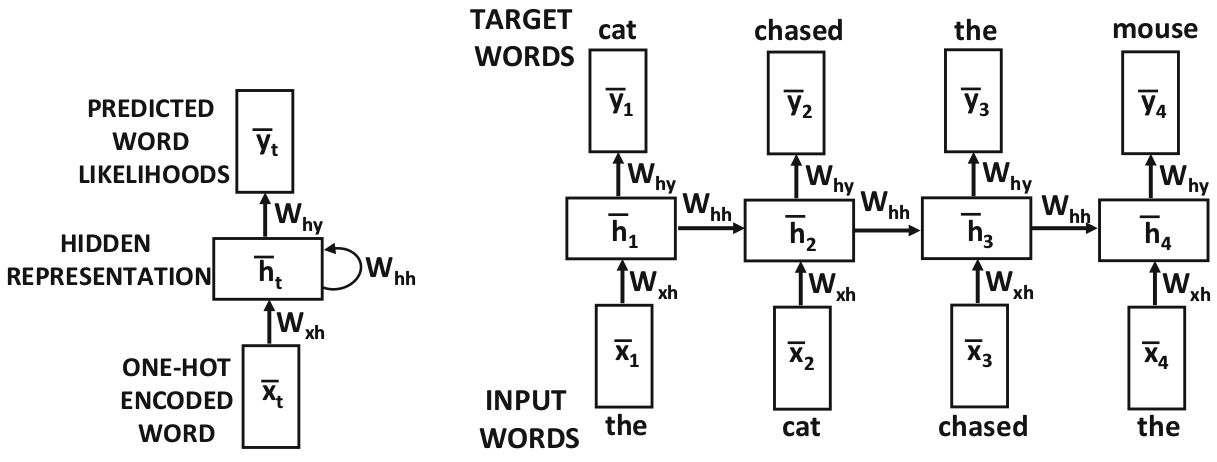

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn1.png",width=800, height=800)

A key point here is the presence of the self-loop in leftmost image, which will cause the hidden state of the neural network to change after the input of each word in the sequence. In practice, one only works
with sequences of finite length, and it makes sense to unfold the loop into a “time-layered”
network that looks more like a feed-forward network. This network is shown in righmost image This representation is
mathematically equivalent to leftmost image. The weight matrices in different temporal layers are
shared to ensure that the same function is used at each time-stamp. The annotations $W_{xh}$,
$W_{hh}$ ,and $W_{hy}$ of the weight matrices in righmost image make the sharing evident.

n practice, it is possible for either the input or the output units
to be missing at any particular time-stamp. Examples of cases with missing inputs and
outputs are shown in below image. The choice of missing inputs and outputs would depend
on the specific application at hand.

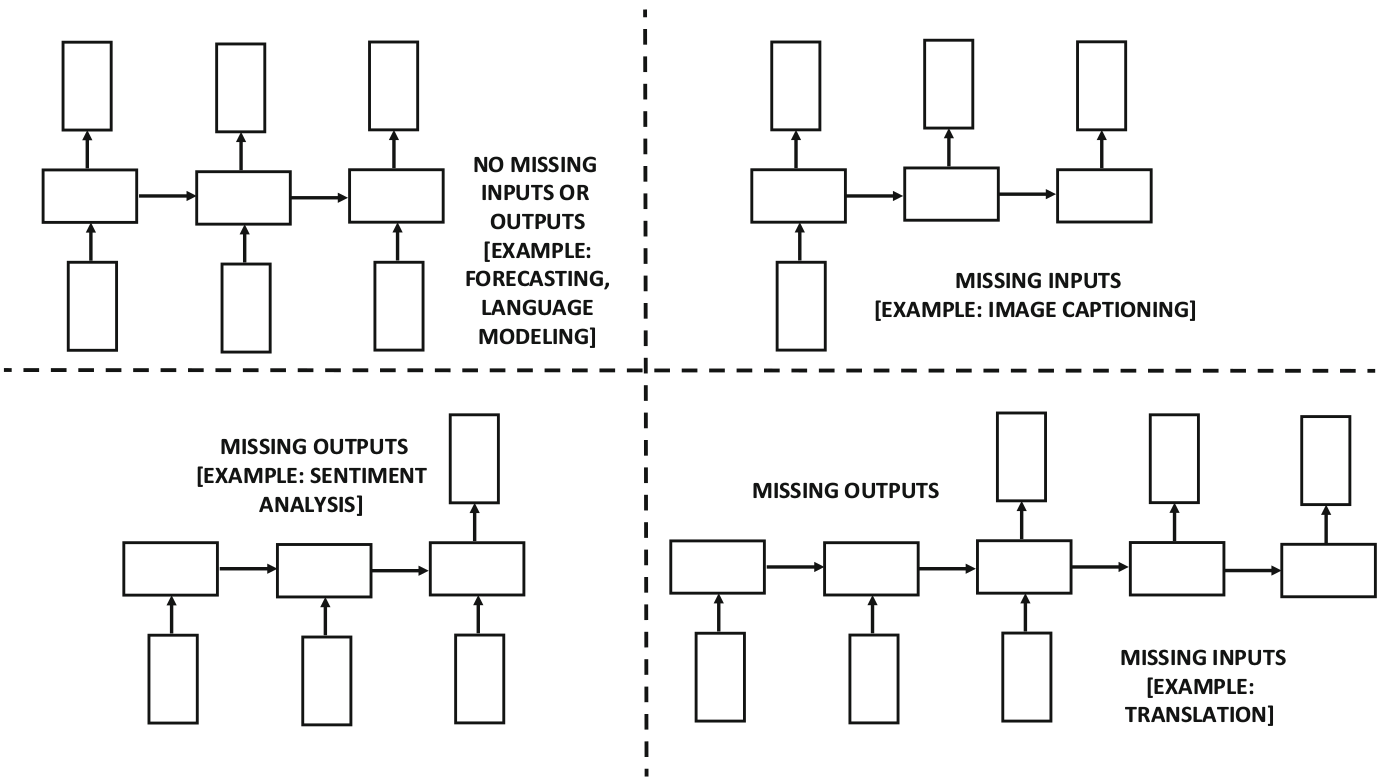

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn2.png",width=800, height=800)

Both $x_t$ and $y_t$ are $d$ dimensional for a lexicon of size $d$. The hidden vector $h_t$ is $p$ dimensional, where $p$ regulates the complexity of the embedding. For the purpose of discussion, we will assume that these vectors are column vectors. In many applications like classification, the output is not produced at each
time unit but is only triggered at the last time-stamp in the end of the sentence. Although
output and input units may be present only at a subset of the time-stamps, we examine the
simple case in which they are present in all time-stamps.

Then, the hidden state at time $t$
is given by a function of the input vector at time $t$ and the hidden vector at time $(t − 1)$:

$$h_t = f(h_{t-1},x_t)$$

This function is defined with the use of weight matrices and activation functions (as used
by all neural networks for learning), and the same weights are used at each time-stamp.
Therefore, even though the hidden state evolves over time, the weights and the underlying
function $f (·, ·)$ remain fixed over all time-stamps.

A separate function $y_t = g(h_t)$ is used to learn the output
probabilities from the hidden states. Next, we describe the functions $f (·, ·)$ and $g(·)$ more concretely.

Let's define dimensions of our matrices.


- $x_t \in \mathbb{R^{d\times 1}}$
- $y_t \in \mathbb{R^{d\times 1}}$
- $h_t \in \mathbb{R^{p\times 1}}$

- $W_{xh} \in \mathbb{R^{p\times d}}$
- $W_{hh} \in \mathbb{R^{p\times p}}$
- $W_{hy} \in \mathbb{R^{d\times p}}$

Then our neural network's function will be

<font size="4">
$$h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_{t})$$

    
$$y_t = W_{hy}h_t$$
</font>

In the very first time-stamp,
$h_{t−1}$ is assumed to be some default constant vector (such as 0), because there is no input
from the hidden layer at the beginning of a sentence. One can also learn this vector, if
desired.

### Language Modeling Example of RNN

In order to illustrate the workings of the RNN, we will use a toy example of a single sequence
defined on a vocabulary of four words. Consider the sentence

    "the cat chased the mouse"

In this case, we have a lexicon of four words, which are {“the,”“cat,”“chased,”“mouse”}. In below figure, we have shown the probabilistic prediction of the next word at each of time-
stamps from 1 to 4.

Ideally, we would like the probability of the next word to be predicted
correctly from the probabilities of the previous words. Each one-hot encoded input vector
$x_t$ has length four, in which only one bit is 1 and the remaining bits are 0s.

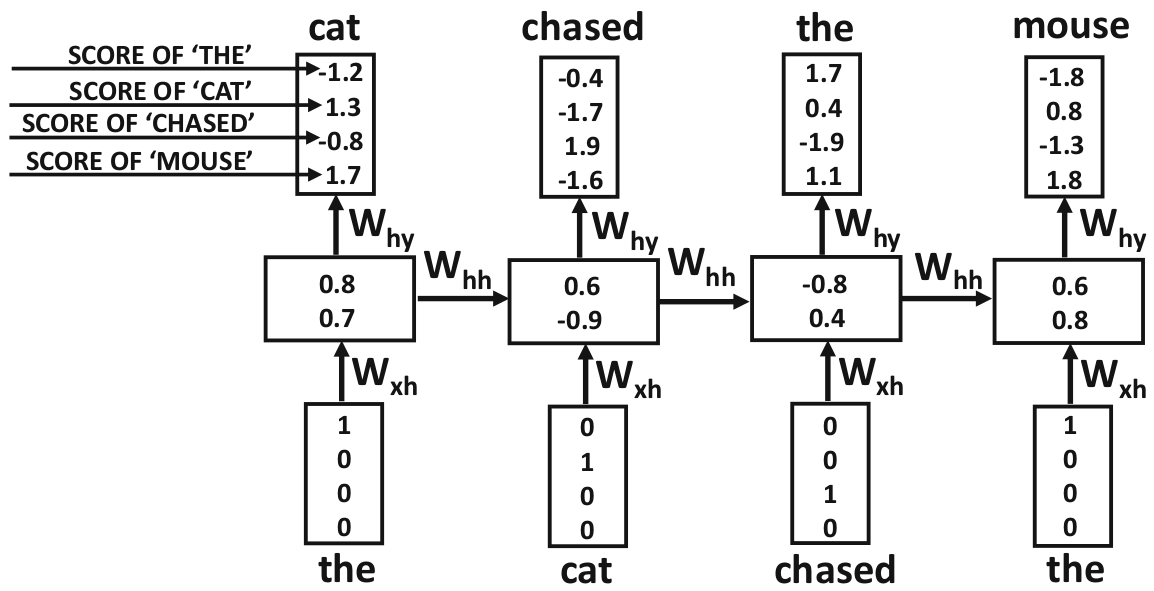

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn3.png",width=600, height=600)

### Generating a Language Sample

Such an approach can also be used to generate an arbitrary sample of a language, once the
training has been completed. How does one use such a language model at testing time, since
each state requires an input word, and none is available during language generation? The
likelihoods of the tokens at the first time-stamp can be generated using the \<START\> token
as input. Since the \<START\> token is also available in the training data, the model will
typically select a word that often starts text segments. Subsequently, the idea is to sample
one of the tokens generated at each time-stamp (based on the predicted likelihood), and
then use it as an input to the next time-stamp. To improve the accuracy of the sequentially
predicted token, one might use beam search to expand on the most likely possibilities by
always keeping track of the b best sequence prefixes of any particular length.
    
By recursively applying this operation, one can generate an
arbitrary sequence of text that reflects the particular training data at hand. If the \<END\>
token is predicted, it indicates the end of that particular segment of text. Although such an
approach often results in syntactically correct text, it might be nonsensical in meaning. For
example, a character-level RNN 1 authored by Karpathy, Johnson, and Fei Fei  was
trained on William Shakespeare’s plays. A character-level RNN requires the neural network
to learn both syntax and spelling. After only five iterations of learning across the full data
set, the following was a sample of the output:

    KING RICHARD II:
    Do cantant,-’for neight here be with hand her,-
    Eptar the home that Valy is thee.
    NORONCES:
    Most ma-wrow, let himself my hispeasures;
    An exmorbackion, gault, do we to do you comforr,
    Laughter’s leave: mire sucintracce shall have theref-Helt.

Note that there are a large number of misspellings in this case, and a lot of the words are
gibberish. However, when the training was continued to 50 iterations, the following was
generated as a part of the sample:

    KING RICHARD II:
    Though they good extremit if you damed;
    Made it all their fripts and look of love;
    Prince of forces to uncertained in conserve
    To thou his power kindless. A brives my knees
    In penitence and till away with redoom.
    GLOUCESTER:
    Between I must abide.

This generated piece of text is largely consistent with the syntax and spelling of the archaic
English in William Shakespeare’s plays, although there are still some obvious errors. Fur-
thermore, the approach also indents and formats the text in a manner similar to the plays
by placing new lines at reasonable locations. Continuing to train for more iterations makes
the output almost error-free.

Of course, the semantic meaning of the text is limited, and one might wonder about
the usefulness of generating such nonsensical pieces of text from the perspective of machine
learning applications. The key point here is that by providing an additional contextual
input, such as the neural representation of an image, the neural network can be made to
give intelligent outputs such as a grammatically correct description (i.e., caption) of the
image. In other words, language models are best used by generating conditional outputs.

The primary goal of the language-modeling RNN is not to create arbitrary sequences
of the language, but to provide an architectural base that can be modified in various ways
to incorporate the effect of the specific context. For example, applications like machine
translation and image captioning learn a language model that is conditioned on another
input such as a sentence in the source language or an image to be captioned. Therefore,
the precise design of the application-dependent RNN will use the same principles as the
language-modeling RNN, but will make small changes to this basic architecture in order
to incorporate the specific context.

Also I have a [very simple language model](https://github.com/safakkbilici/Simple-Language-Model-With-LSTM) based on the bible:

    And all that he touched them will kindle commanded us out arm, to afflict the captivity of death. 

    stones: not right shoulder: behold them, and 
    after me, as I will cause my defence; I have vowed. 
    18:11 though he removed my womb, and thou lovedst that 
    Jehoiachin exceeding joy: And there be as it 
    Moses, Wherefore our oppression: and he whom God of Rabshakeh, 
    thou exalt thee one of all the Egyptians shall I took they shall rise up, and 
    my partner the least esteemed them out the abominable, and sing praise 
    of Dan. 
    1:15 that there be as to hurt the scribes sitting on the son of the woman: Wherefore kick against Israel, saying might 
    all thy servants, I am not on an 
    the book of Israel; but raw. 
    every 
    within, and over the son of the sight of Israel, whom 
    LORD, thou lovedst his brethren in this man's seed in sacrifice of Jehoiakim, commanded thee and she beareth them: 16:54 see that thy mother, and Omega, the congregation in the 
    burn incense before him, but raw. 

    6:1 And this sort; and I found left her, and the people, and from man. 
    there is Cush; full years, and  them, to him, and this should be to him in thine heart to bear his own city on mine enemies, which no man to condemn him walking through him unto you, to Babylon. And the singers had wives of Reuben until the son of Judas Iscariot brought her house, and Mushi. And we do all 
    10:35 Then said unto me the firstborn and hath chosen her seed; desire to keep, For the 
    4:13 Jesus answered and behind thee, which ruled over our God to condemn him 
    shall keep all your same night thy word of trumpets, and with me? 9:22 9:5 For thou hast brought you for the sound of Uzzi, what shall be angry, not for as a door of Israel? God hath made bread. 
    possessed with hearing. 
    for in the work in the saints, and ever. 
    14:12 When Jesus of her away. 


### Backpropagation Through Time

One can look at my post about [Training Bidirectional Recurrent Neural Networks](https://safakkbilici.github.io/training-bidirectional-rnns/), it is about backpropagation on bi-directional RNNs but it is nearly same with vanilla RNNs.

### Multilayer RNNs

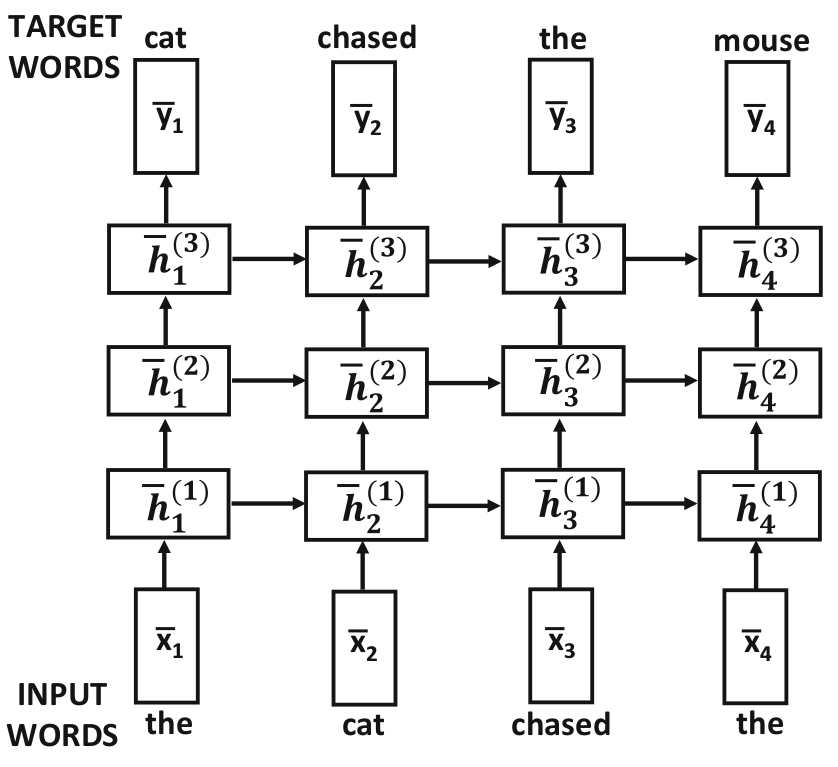

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn4.png",width=400, height=400)

### Bi-directional RNNs

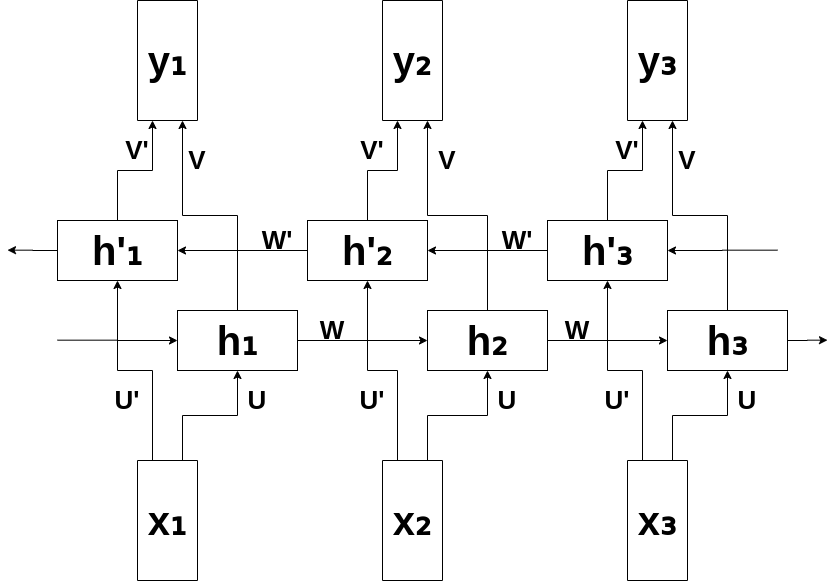

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn5.png",width=600, height=600)

$$h_t = tanh(U x_t + W h_{t-1})$$

$$h_t' = tanh(U' x_t + W' h_{t+1}')$$

$$\hat{y}_t = softmax(V h_t + V' h_t')$$

Best blog post on rnns->
[The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

## Canonical Recurrent Neural Networks (LSTMs, GRUs, Echo State)

## Motivation
One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames might inform the understanding of the present frame. If RNNs could do this, they’d be extremely useful. But can they? It depends.

Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones. If we are trying to predict the last word in “the clouds are in the *sky*,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.

But there are also cases where we need more context. Consider trying to predict the last word in the text “I grew up in France… I speak fluent *French*.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. It’s entirely possible for the gap between the relevant information and the point where it is needed to become very large.

Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.

In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them.

[This paper](http://ai.dinfo.unifi.it/paolo//ps/tnn-94-gradient.pdf) shows that learning long-term dependencies with gradient descent is difficult.

## Long Short Term Memory Networks (LSTMs)

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

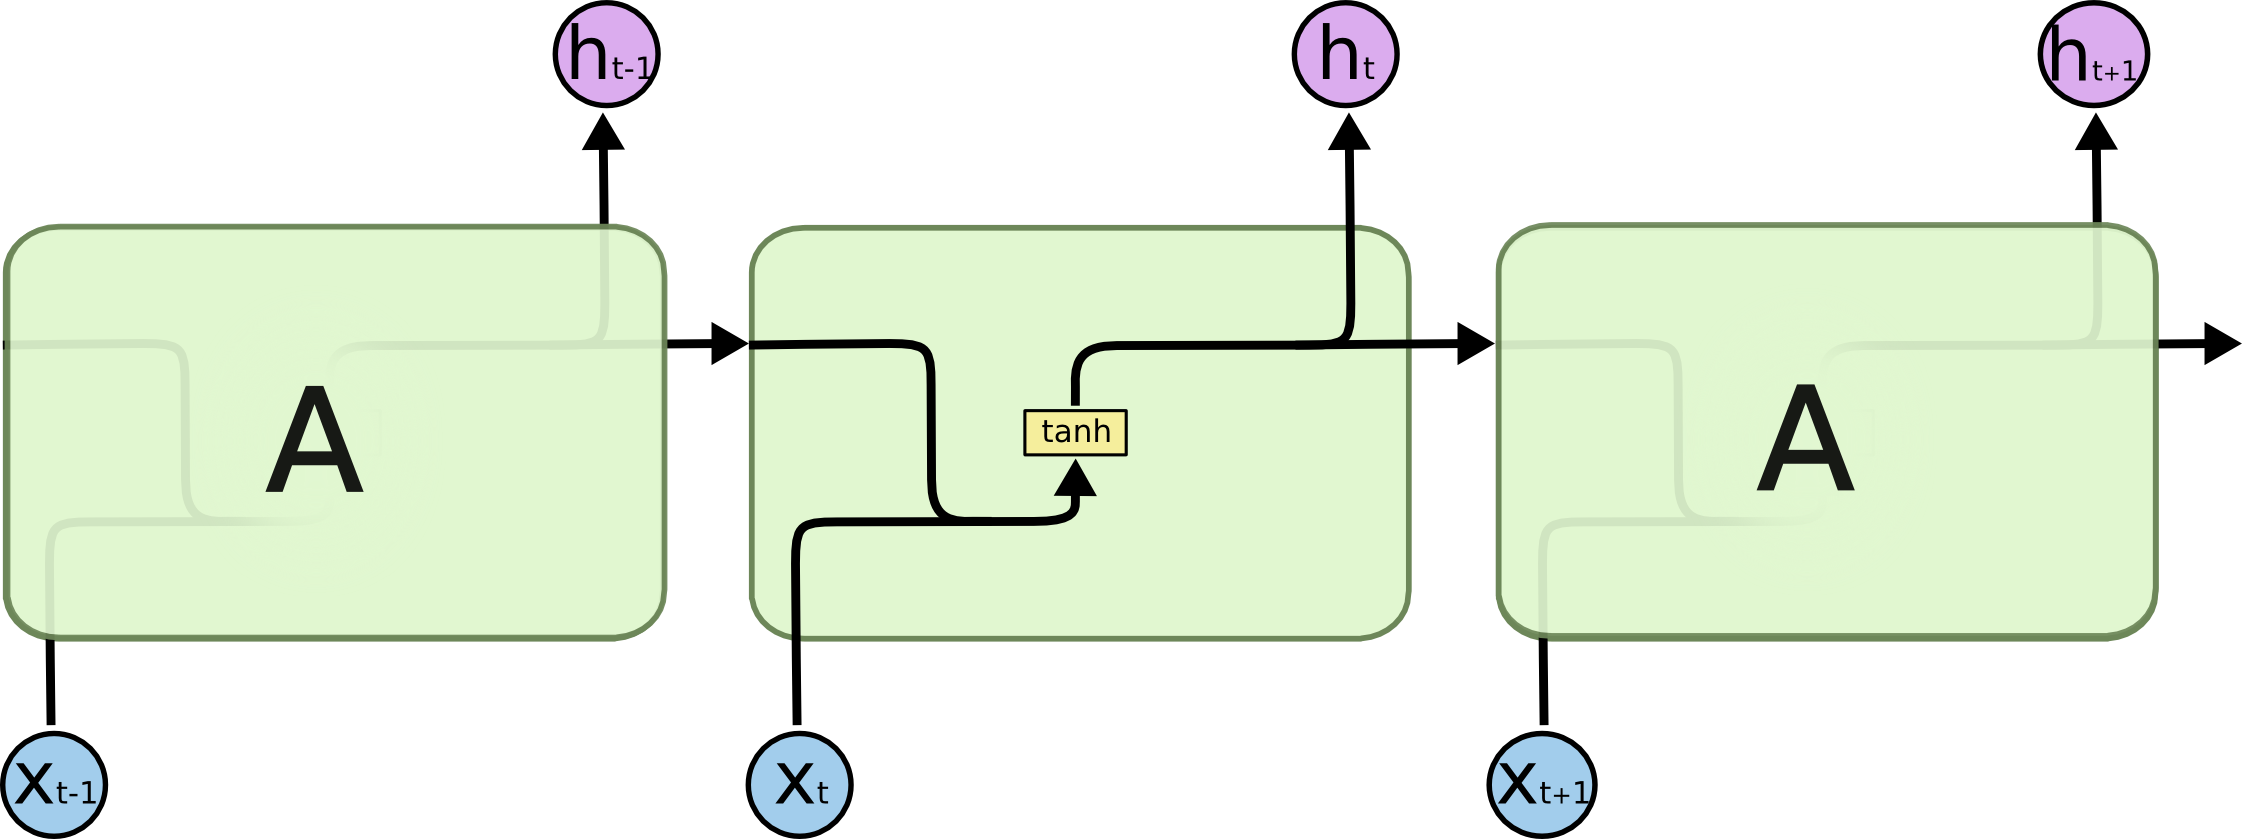

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm1.png",width=600, height=600)

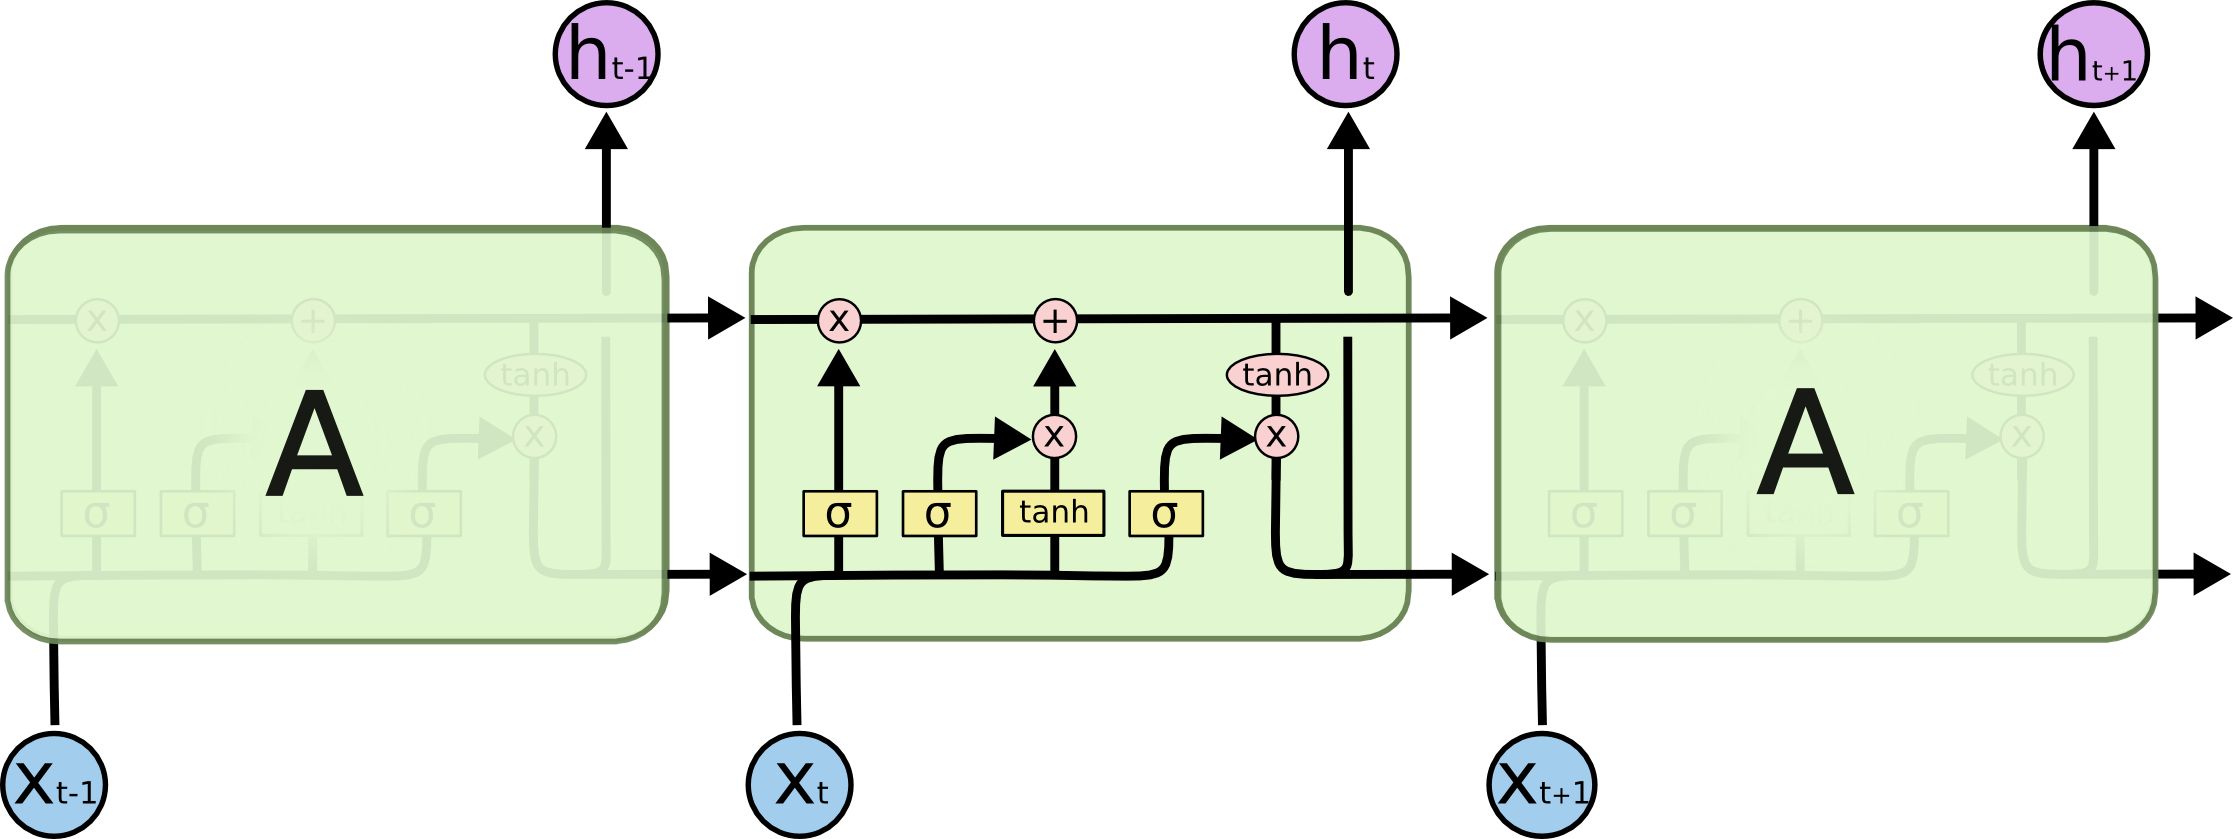

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm2.png",width=800, height=800)

- All circled operations are pointwise operations.
- Single arrow means vector transfer.
- Converging arrow means concatenate.
- Separated arrow mean copy.



**The cell state** is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged. The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates:

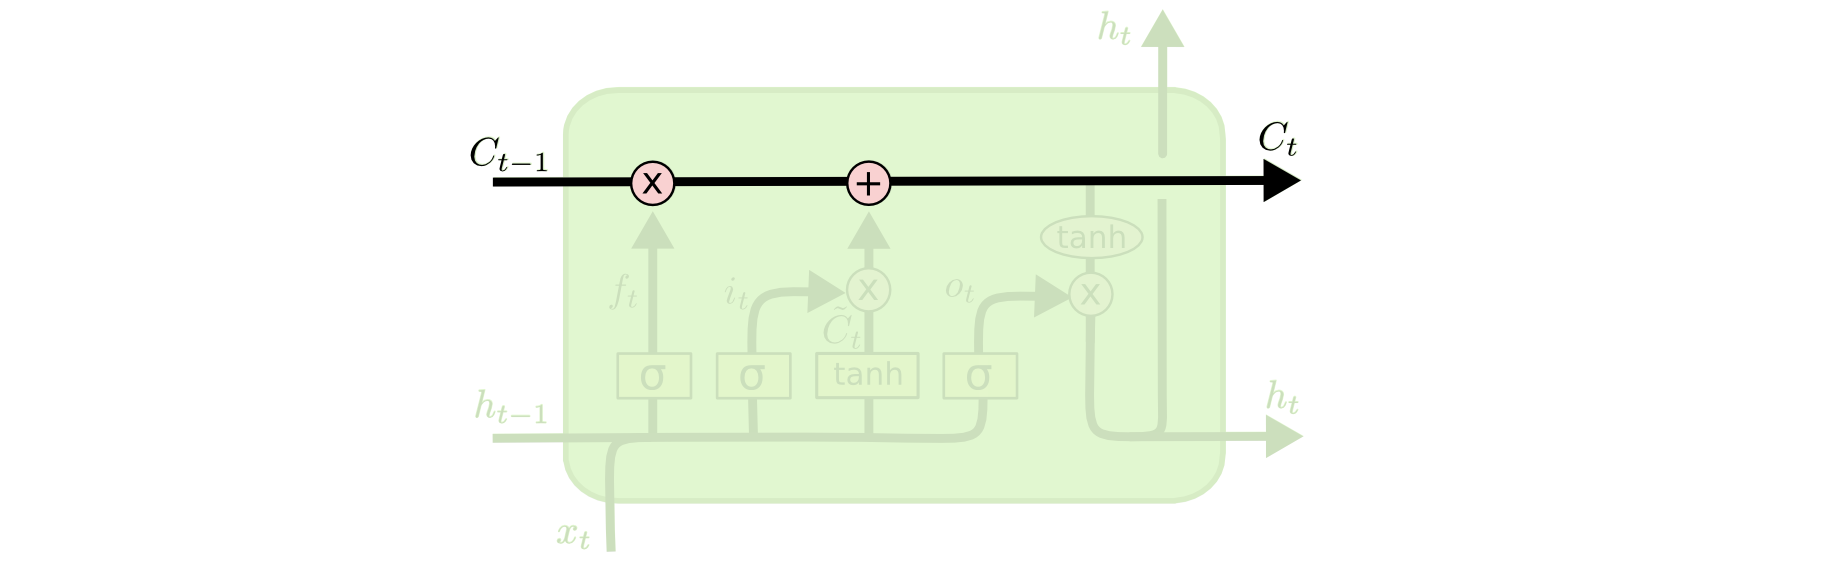

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm3.png",width=800, height=800)

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called **gates**.

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

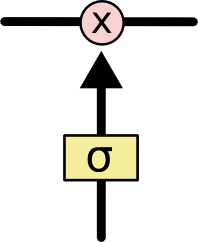

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm4.png",width=100, height=100)

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means **“let nothing through”** while a value of one means **“let everything through!”**

An LSTM has three of these gates, to protect and control the cell state.

### Step-by-Step LSTM Walk Through

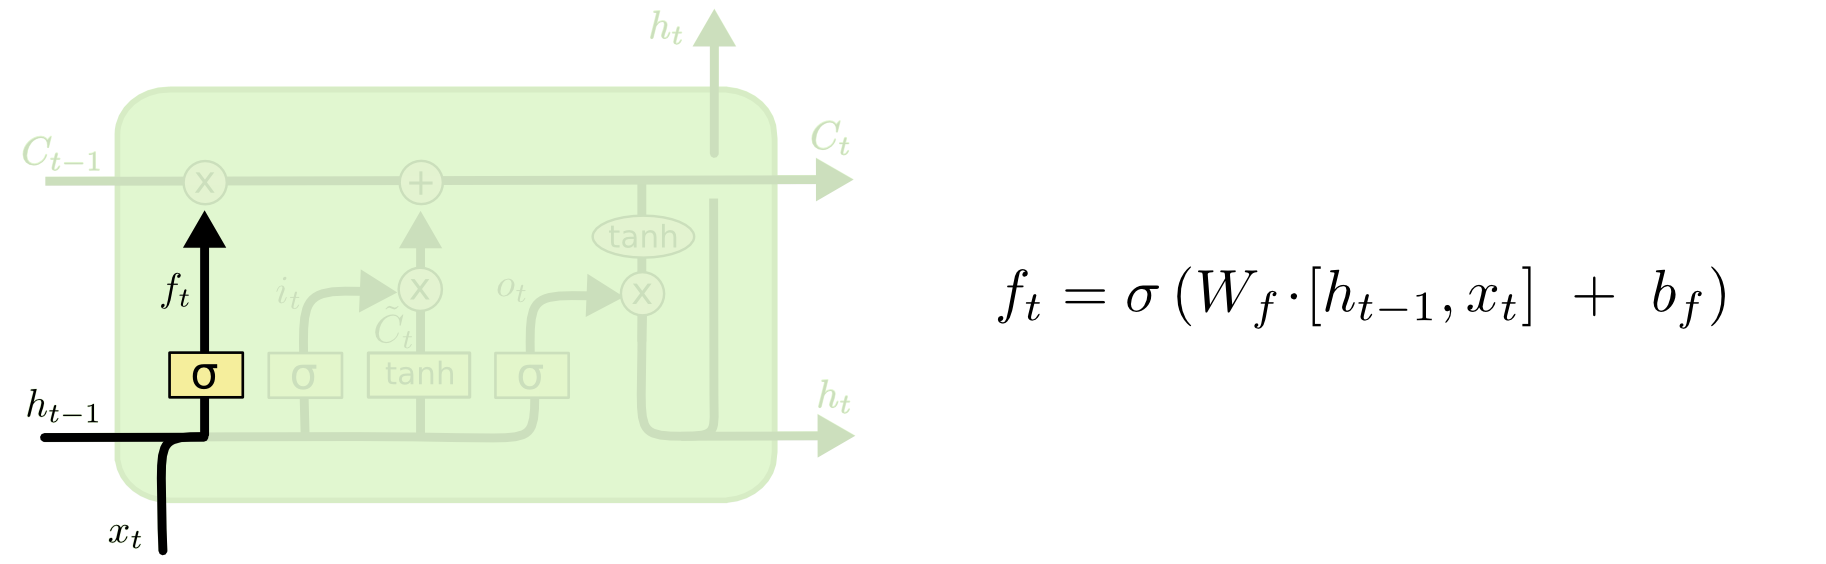

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm5.png",width=800, height=800)

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the **“forget gate layer”**. It looks at $h_{t-1}$ and $x_t$ and outputs a number between 0 and 1 for each number in the cell state $C_{t−1}$. **A 1 represents “completely keep this” while a 0 represents “completely get rid of this”**.

Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.

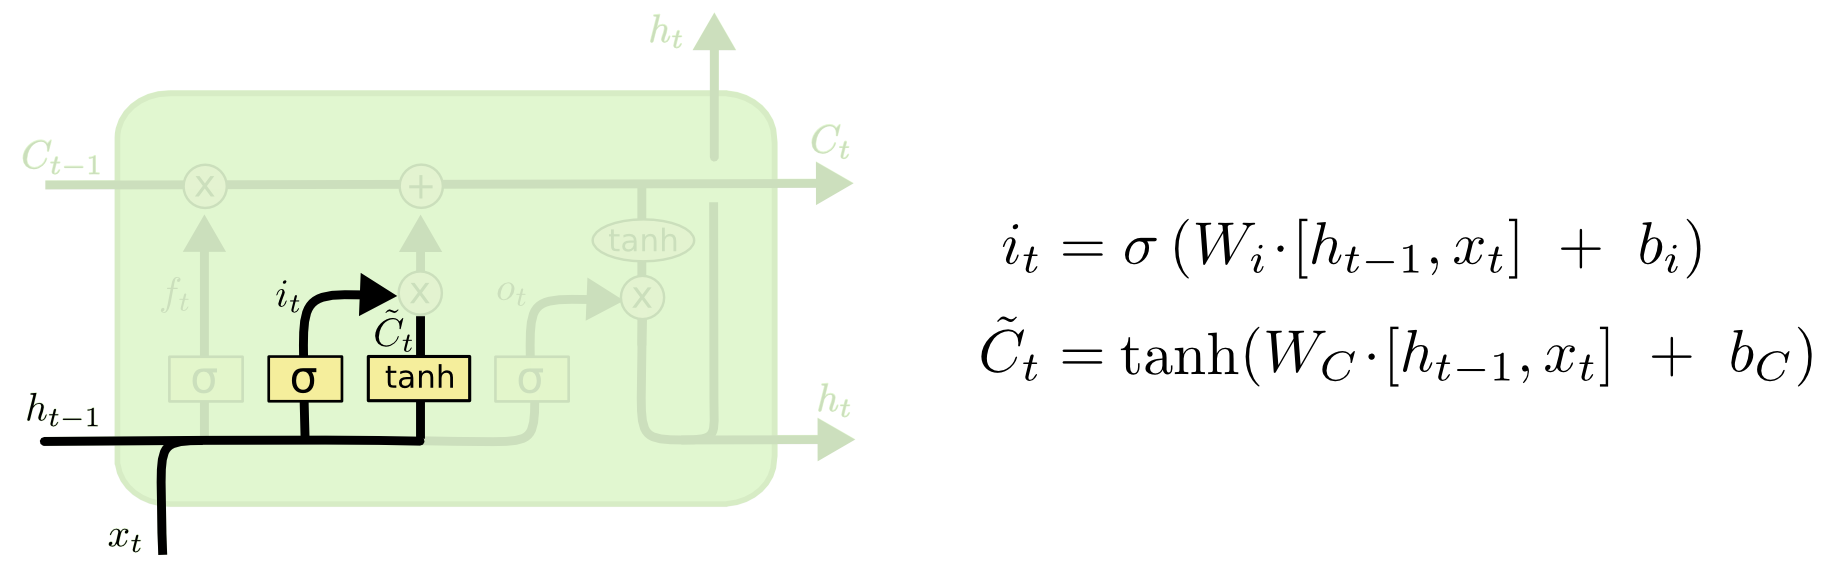

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm6.png",width=800, height=800)

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the **“input gate layer”** **decides which values we’ll update**. Next, a tanh layer creates a vector of new candidate values, $\hat{C}_t$, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

In the example of our language model, we’d want to add the gender of the new subject to the cell state, to replace the old one we’re forgetting.

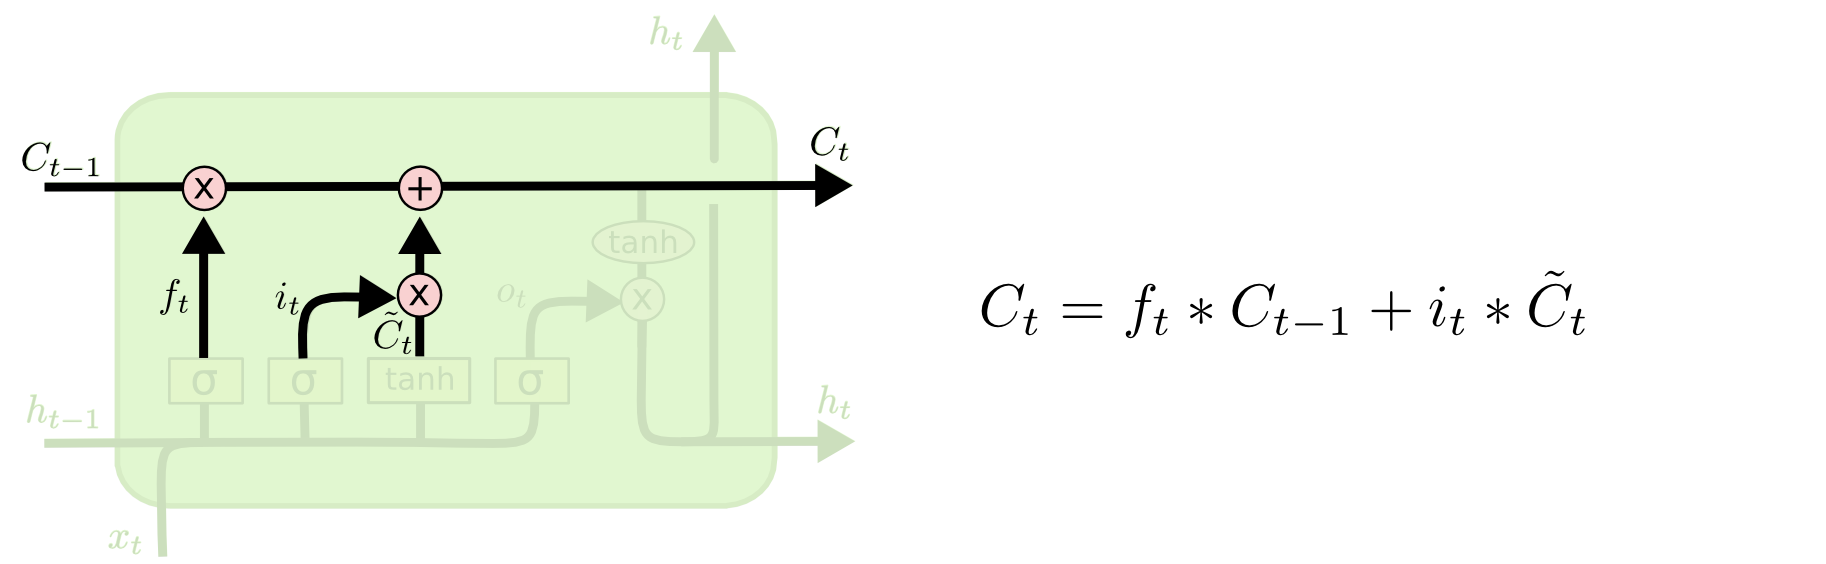

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm7.png",width=800, height=800)

It’s now time to update the old cell state, $C_{t−1}$, into the new cell state $C_t$. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by $f_t$, forgetting the things we decided to forget earlier. Then we add it $i_t * \hat{C}_t$. This is the new candidate values, scaled by how much we decided to update each state value. In the case of the language model, this is where we’d actually drop the information about the old subject’s gender and add the new information, as we decided in the previous steps.

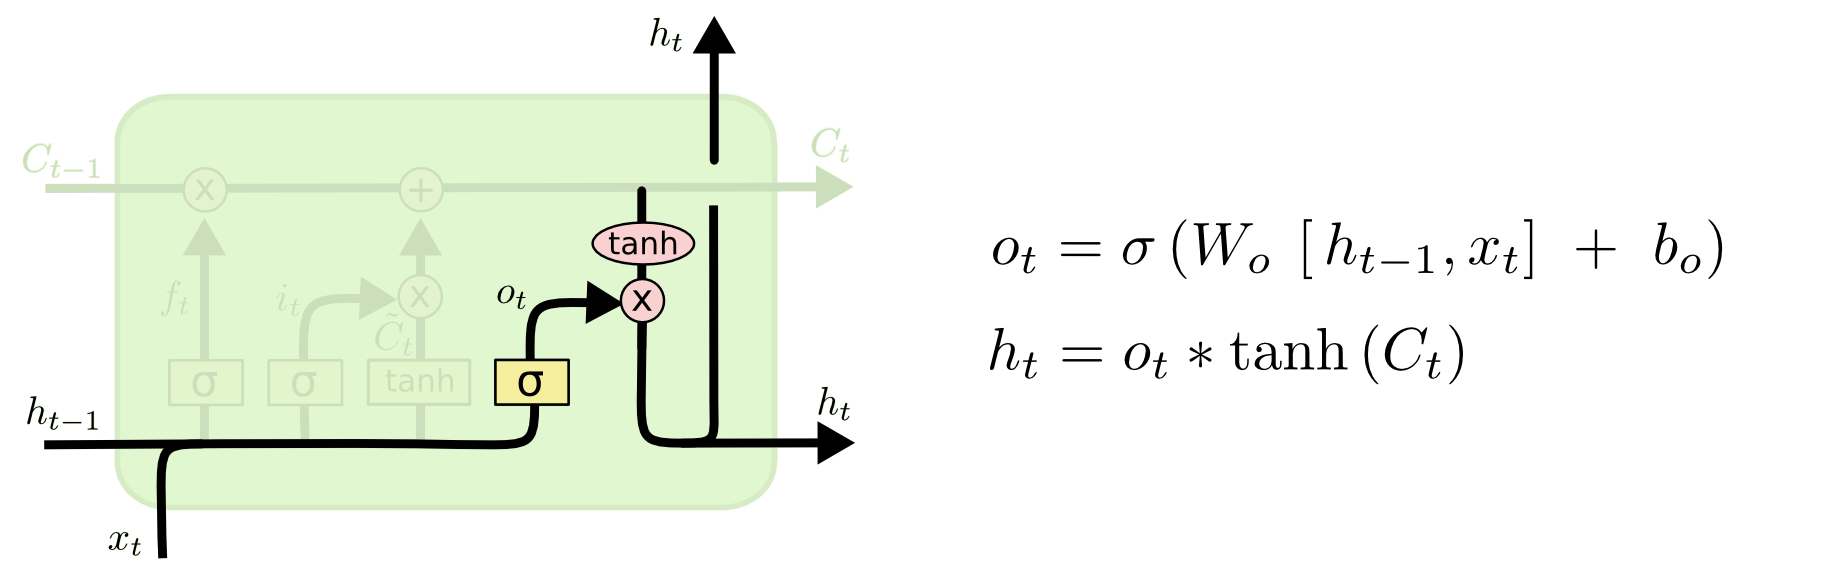

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm8.png",width=800, height=800)

Finally, we need to decide **what we’re going to output**. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer **which decides what parts of the cell state we’re going to output**. Then, we put the cell state through $\tanh$ (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that **we only output the parts we decided to**. 

For the language model example, since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.

## Gated Recurrent Unit (GRUs)

A slightly more dramatic variation on the LSTM is the Gated Recurrent Unit, or GRU, introduced by [Cho et al., 2014](https://arxiv.org/pdf/1412.3555.pdf). It combines the forget and input gates into a single “update gate.” It also merges the cell state and hidden state, and makes some other changes. The resulting model is simpler than standard LSTM models, and has been growing increasingly popular.

These are only a few of the most notable LSTM variants. There are lots of others, like [Depth Gated RNNs by Yao, et al. (2015)](https://arxiv.org/pdf/1508.03790v2.pdf). There’s also some completely different approach to tackling long-term dependencies, like [Clockwork RNNs by Koutnik, et al. (2014)](https://arxiv.org/pdf/1402.3511v1.pdf). Which of these variants is best? Do the differences matter? [Greff, et al. (2015)](https://arxiv.org/pdf/1503.04069.pdf) do a nice comparison of popular variants, finding that they’re all about the same. [Jozefowicz, et al. (2015)](http://proceedings.mlr.press/v37/jozefowicz15.pdf) tested more than ten thousand RNN architectures, finding some that worked better than LSTMs on certain tasks.

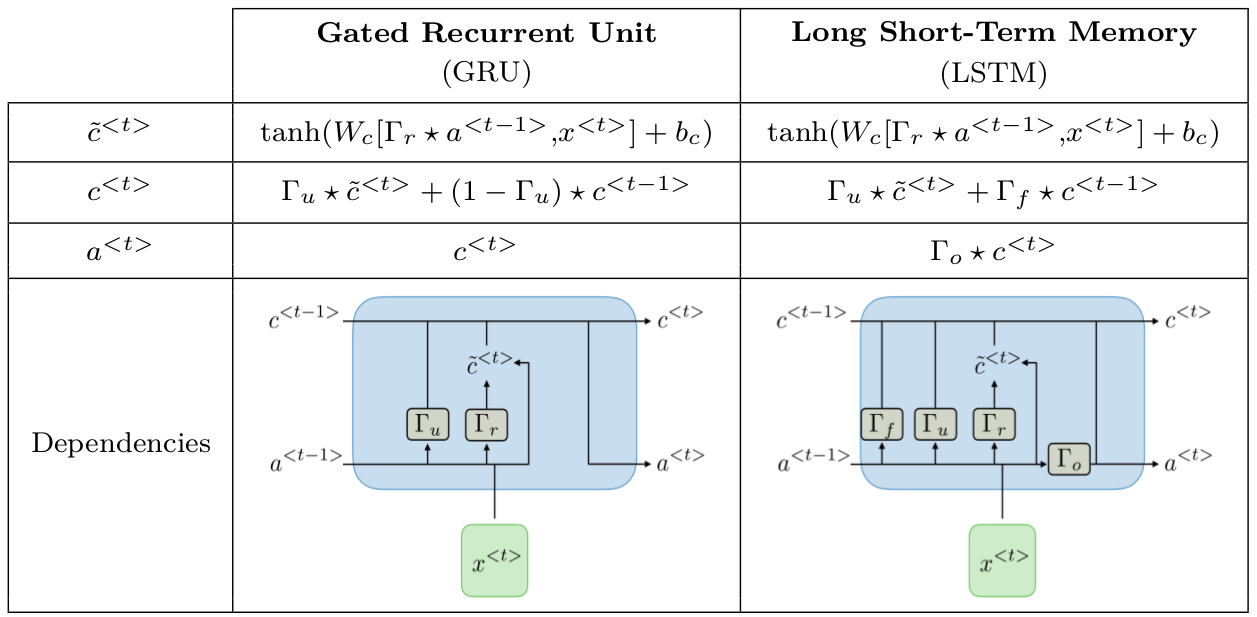

In [54]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm9.png",width=800, height=800)

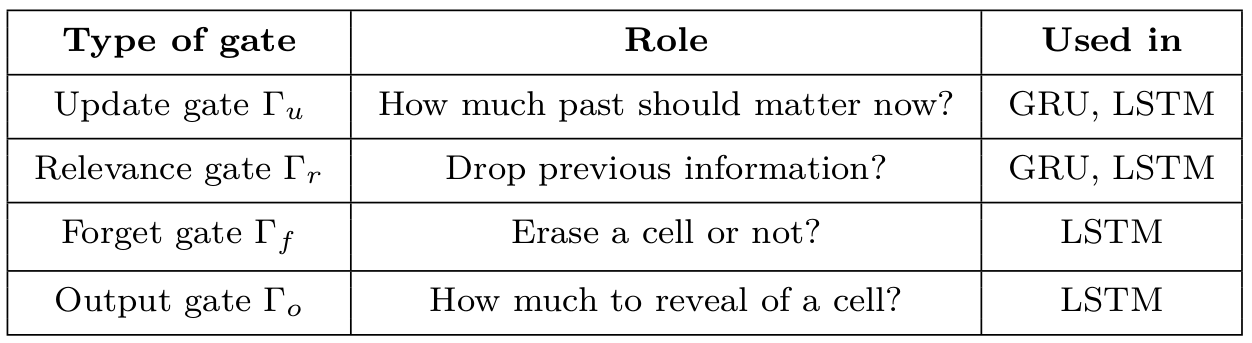

In [55]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/lstm10.png",width=800, height=800)

# Natural Language Processing

## Representation Of Text

One-hot encoding is the most common, most basic way to turn a token into a vector.  It consists in associating a unique integer index to every word, then turning this integer index $i$ into a binary vector of size $N$, the size of the vocabulary, that would be all-zeros except for the $i$-th entry, which would be 1.

In [37]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
sentence = "the dog ate the cat"
seq = []
for word in sentence.split():
    one_hot = np.zeros((1,len(token_index)))
    if word not in token_index:
        seq.append(one_hot.squeeze())
    else:
        one_hot[0,token_index[word]-1] = one_hot[0,token_index[word]-1] + 1
        seq.append(one_hot.squeeze())

In [41]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [39]:
seq

[array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])]

There are two major issues with this approach.
First issue is the curse of dimensionality, which refers to all sorts of problems that arise with data in high dimensions. Even with relatively small eight dimensions, our example text requires exponentially large memory space. Most of the matrix is taken up by zeros, so useful data becomes sparse. Imagine we have a vocabulary of 50,000. (There are roughly a million words in English language.) Each word is represented with 49,999 zeros and a single one, and we need 50,000 squared = 2.5 billion units of memory space. Not computationally efficient.

Second issue is that every one hotted vector is orthogonal to each other. You cannot measure the similarity (like cosine similarity) on this vectors.

Word embeddings fixes that problem. A word embedding $W:\text{words} \rightarrow \mathbb{R}^n$ is a paramaterized function mapping words in some language to high-dimensional vectors (perhaps 200 to 500 dimensions). For example:

$$W("\text{cat}") = (0.2,~ \text{-}0.4,~ 0.7,~ ...)$$

$$W("\text{mat}") = (0.0,~ 0.6,~ \text{-}0.1,~ ...)$$

$W$ is initialized to have random vectors for each word. It learns to have meaningful vectors in order to perform some task.

For example, one task we might train a network for is predicting whether a 5-gram (sequence of five words) is ‘valid.’ We can easily get lots of 5-grams from Wikipedia (eg. “cat sat on the mat”) and then ‘break’ half of them by switching a word with a random word (eg. “cat sat song the mat”), since that will almost certainly make our 5-gram nonsensical.

The model we train will run each word in the 5-gram through $W$ to get a vector representing it and feed those into another ‘module’ called $R$ which tries to predict if the 5-gram is ‘valid’ or ‘broken.’ Then, we’d like:

$$R(W("\text{cat}\!"),~ W("\text{sat}\!"),~ W("\text{on}\!"),~ W("\text{the}\!"),~ W("\text{mat}\!")) = 1$$
                                           
$$R(W("\text{cat}\!"),~ W("\text{sat}\!"),~ W("\text{song}\!"),~ W("\text{the}\!"),~ W("\text{mat}\!")) = 0$$

This kind of ‘map’ of words makes a lot of intuitive sense to us. Similar words are close together. Another way to get at this is to look at which words are closest in the embedding to a given word. Again, the words tend to be quite similar.

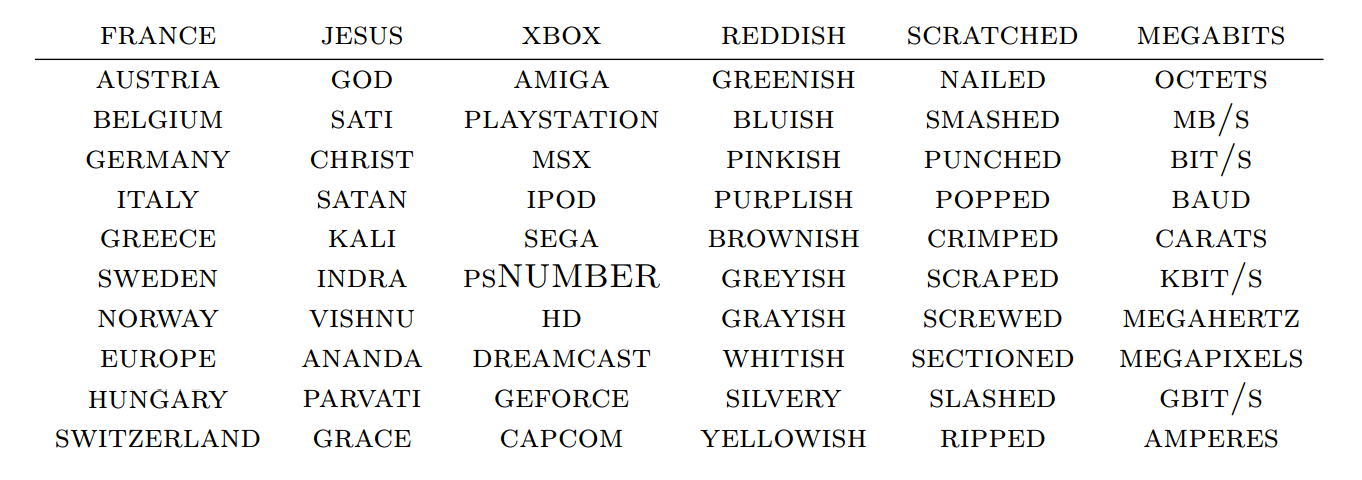

In [42]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/embed.png",width=800, height=800)

It seems natural for a network to make words with similar meanings have similar vectors. If you switch a word for a synonym (eg. “a few people sing well” $\rightarrow$ “a couple people sing well”), the validity of the sentence doesn’t change. While, from a naive perspective, the input sentence has changed a lot, if $W$ maps synonyms (like “few” and “couple”) close together, from $R$’s perspective little changes.

We still need to see examples of every word being used, but the analogies allow us to generalize to new combinations of words. You’ve seen all the words that you understand before, but you haven’t seen all the sentences that you understand before. So too with neural networks.

Word embeddings exhibit an even more remarkable property: analogies between words seem to be encoded in the difference vectors between words. For example, there seems to be a constant male-female difference vector:

$$W("\text{woman}\!") - W("\text{man}\!") ~\simeq~ W("\text{aunt}\!") - W("\text{uncle}\!")$$

$$W("\text{woman}\!") - W("\text{man}\!") ~\simeq~ W("\text{queen}\!") - W("\text{king}\!")$$

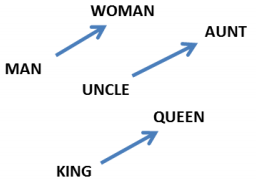

In [45]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/embed2.png",width=300, height=300)

This may not seem too surprising. After all, gender pronouns mean that switching a word can make a sentence grammatically incorrect. You write, “she is the aunt” but “he is the uncle.” Similarly, “he is the King” but “she is the Queen.” If one sees “she is the uncle,” the most likely explanation is a grammatical error. If words are being randomly switched half the time, it seems pretty likely that happened here.

“Of course!” We say with hindsight, “the word embedding will learn to encode gender in a consistent way. In fact, there’s probably a gender dimension. Same thing for singular vs plural. It’s easy to find these trivial relationships!”

It turns out, though, that much more sophisticated relationships are also encoded in this way. It seems almost miraculous!

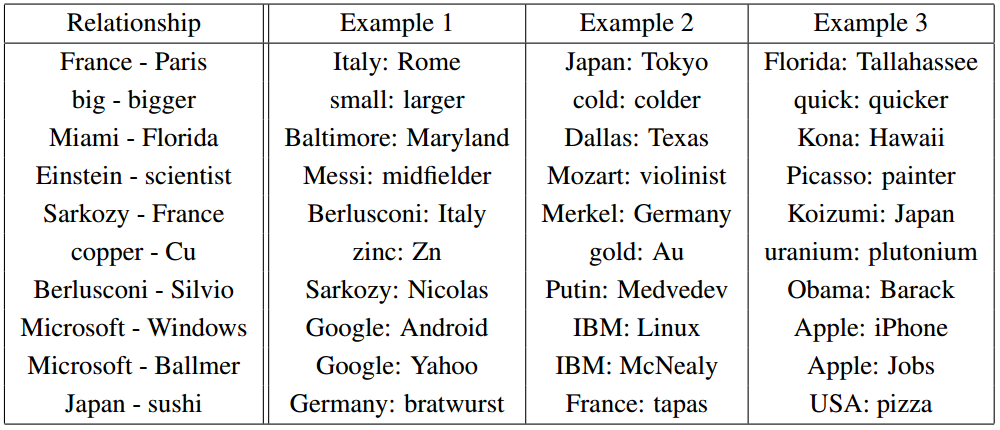

In [48]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/embed3.png",width=800, height=800)

This seems to be a great strength of neural networks: they learn better ways to represent data, automatically. Representing data well, in turn, seems to be essential to success at many machine learning problems. Word embeddings are just a particularly striking example of learning a representation.

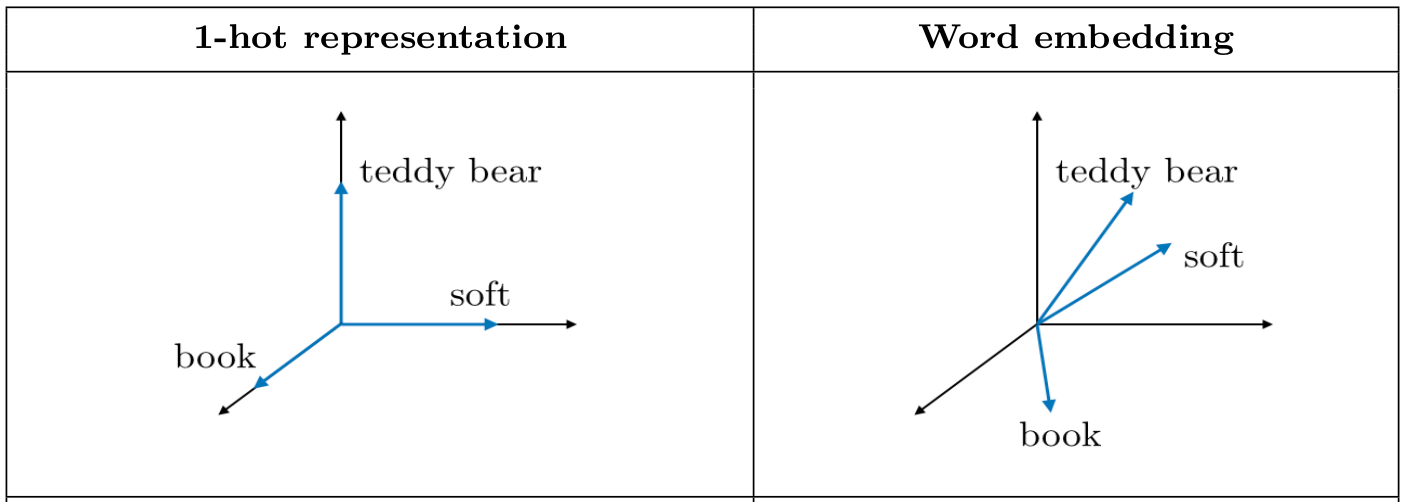

In [51]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/embed4.png",width=800, height=800)

## Word Tokenization

Word tokenization is the process of splitting a large sample of text into words. This is a requirement in natural language processing tasks where each word needs to be captured and subjected to further analysis like classifying and counting them for a particular sentiment etc.

In [66]:
import nltk
nltk.data.path.append('/media/safak/Data/NLTK/')

sentence = "It originated from the idea that there are readers, who prefer learning new skills from the comforts of their drawing rooms."
tokens = nltk.word_tokenize(sentence)
tokens.insert(0,"<GO>")
tokens.append("<EOS>")
print(tokens)
print(len(tokens))

['<GO>', 'It', 'originated', 'from', 'the', 'idea', 'that', 'there', 'are', 'readers', ',', 'who', 'prefer', 'learning', 'new', 'skills', 'from', 'the', 'comforts', 'of', 'their', 'drawing', 'rooms', '.', '<EOS>']
25


In [67]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens_punc = tokenizer.tokenize(sentence)
tokens_punc.insert(0,"<GO>")
tokens_punc.append("<EOS>")
print(tokens_punc)
print(len(tokens_punc))

['<GO>', 'It', 'originated', 'from', 'the', 'idea', 'that', 'there', 'are', 'readers', 'who', 'prefer', 'learning', 'new', 'skills', 'from', 'the', 'comforts', 'of', 'their', 'drawing', 'rooms', '<EOS>']
23


### Issues In Tokenization
- "Finland's capital" $\rightarrow$ "Finlands" or "Finland" or "Finland's" or "Finland", "s"
- "What're, I'm isn't" $\rightarrow$ What are, I am, is not
- "State-of-the-art" $\rightarrow$ State of the art
- "San Fransisco" $\rightarrow$ One token or two?
- "m.p.h, PhD." $\rightarrow$ ??

### Another Tokenization Problems In Different Languages
- "L'enseble" $\rightarrow$ one or two token? $\rightarrow$ L? L'? Le? $\rightarrow$ We want "L'ensemble" to match with "Un ensemble"
- "Lebensversicherungsgesellschaftsangestellter" $\rightarrow$ "Life insurance company employee" $\rightarrow$ German information retrieval needs compound splitter.
- Chineese and Japanese has no spaces between words.
- Further complicated in Japanese, with multiple alphabets intermingled.


Word tokenization in Chinese also called Word Segmentation. Chinese words are composed of characters.
- Characters are generally 1 syllable (TR: hece) and 1 morpheme (TR: kök)(smallest meaningful unit in a language).
- Avarage word is 2.4 long.
- Standart baseline algorithm: maximum matching algorithm (also called greedy).

        Algoritm: Maximum Matching Word Segmentation
        -------------------------------------------------------------------------------------
        Required: given a wordlist Chinese, and a string
          1: Start a pointer at the beginning of the string
          2: Find the longest word in dictionary that matches the string starting at pointer
          3: Move to the pointer over the word in string
          4: goto 2
        -------------------------------------------------------------------------------------

- Does not work well with English.
- But work astonishingly well in Chinese.
- Modern probabilistic segmentation algorithms even better.
- Problems in English:

        Thetabledownthere -> The table down there
        Thetabledownthere -> Theta bled own there

## Normalization

- We need to normalize terms.

        indexed text \& query terms must have same form
           (eg, we want to match U.S.A and USA)
           
- Asymmetric Expansion

        Enter: window,  Search: window, windows
        Enter: window,  Search: Windows, windows, window
        Enter: Windows, Search: Windows

### Case Folding
- Applications like information retrieval: reduce all letters to lower case

        -> since users tend to use lower case
        -> possible exception: upper case in mid-sentence?
            eg,
                - Fed vs fed
                - SAIL vs sail
                - FAIR vs fair
                - US vs us
                
### Lemmatization
- Reduce inflections or variant forms to base form. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. (SAME ROOT BUT DIFFERENT SURFACE)

                   am, is, are   -> be
        car, cars, car's, cars'  -> car
               dinner, dinners   -> dinner
               
#### Morphology
- Morphemes: small meaningfull units that make up words.
- Stems: The core meaning-bearing units.
- Affixes: Bits and pieces that adhere to stems (often with grammatical functions).

A morpheme is a part of a word that can’t be divided, whereas a stem is essentially the “root” of a word which can have modifiers added to it.

### Stemming
- Reduce terms to their stems in informational retrieval.
- Stemming is crude chopping of affixes.

        -> language dependent
        -> eg,
              automates, automatic, automation -> automat

The English language has more than a million words in its vocabulary. Around 170k are in current use. These words grouped to form a sentence by following grammatical rules. Due to logical reasons, sentences use a different form of words derived from one another, such as plays, played, and playing.
While working in Natural Language Processing (NLP) models and problems, these words not help much. The main focus of NLP problems is to achieve the result from fewer words. Solving this problem saves a lot of processing time and disk space.

In the context of machine learning based NLP, stemming makes your training data more dense. It reduces the size of the dictionary (number of words used in the corpus) two or three-fold (of even more for languages with many flections like French, where a single stem can generate dozens of words in case of verbs for instance).

Having the same corpus, but less input dimensions, ML will work better. Recall should really be better.

The downside is, if in some cases the actual word (as opposed to its stem) makes a difference, then your system won't be able to leverage it. So you might lose some precision.

#### Porter's Algorithm

    Algorithm: Porter
    -------------------------------------------------------------
        Step 1A:
                    sses    ->     ss,     caresses  -> caress
                    ies     ->      i,       ponies  -> poni
                    ss      ->     ss,       caress  -> caress

        Step 1B:
                   (*V*)ing ->     -,       walking  -> walk
                   (*V*)ed  ->     -,     plastered  -> plaster

        Step 2: (for long stems)
                   ational  ->   ate,    relational -> relate
                   izer     ->   ize,   digitalizer -> digitalize
                   ator     ->   ate,      operator -> operate

        Step 3: (for longer stems)
                   al       ->   -,         revival -> reviv
                   able     ->   -,      adjustable -> adjust
                   ate      ->   -,        activate -> activ
                   ...
    -------------------------------------------------------------

In [73]:
import nltk
porter_stemmer = nltk.PorterStemmer()
sentence = "He determined to drop his litigation with the monastery, and relinquish his claims to the wood cutting and fishery rights at once. He was more ready to do this."
stemmed = [porter_stemmer.stem(word) for word in sentence.split()]
print(f"Original text: {sentence} \n")
print(f"Stemmed text : {' '.join(stemmed)}")

Original text: He determined to drop his litigation with the monastery, and relinquish his claims to the wood cutting and fishery rights at once. He was more ready to do this. 

Stemmed text : He determin to drop hi litig with the monastery, and relinquish hi claim to the wood cut and fisheri right at once. He wa more readi to do this.


In [75]:
snowball_stemmer = nltk.SnowballStemmer('english')
stemmed_snowball = [snowball_stemmer.stem(word) for word in sentence.split()]
print(f"Original text: {sentence} \n")
print(f"Stemmed text : {' '.join(stemmed_snowball)}")

Original text: He determined to drop his litigation with the monastery, and relinquish his claims to the wood cutting and fishery rights at once. He was more ready to do this. 

Stemmed text : he determin to drop his litig with the monastery, and relinquish his claim to the wood cut and fisheri right at once. he was more readi to do this.


### Sentence Segmentation

- (!), (?) are relatively unambigious

- Period (.) is quite ambigious

        -> Sentence boundary
        -> Abbreviations like Inc. or Dr.
        -> Numbers like .02% or 4.3
        
Build a binary classifier 


    if(Lots of blank lines after me):
       EOS
    else if(Final punctuation is ?, ! or :):
       EOS
    else if(Final punctuation is period):
       if(I am etc or other abbreviation):
           Not EOS
        else:
            EOS
    else: 
       Not EOS
       
- More sophisticated classifier features:

        -> Length of word with "."
        -> P(word with "." occurs at EOS)
        -> P(word with "." occurs at BOS)
                    |
                    -> ".The" -> Beggining of sentence high probability

## N-Grams

#### Probabilistic Language Models
- Assigns a probability to a sentence
    - Machine Translation
        - Dil peyniri
        - P(string cheese) > P(language cheese)
    - Spell Correction
        - P(about three minutes from) > P(about three minuets from)
    - Speech Correction
        - P(I saw a van) >> P(eyes awe of an)
        
- Goal: compute the probability of a sentence or sequence of words

    - $p(W) = p(w_1,w_2,w_3,...,w_n)$
    
- Related Task: probability of an upcoming word

    - $p(w_5|w_1,w_2,w_3,w_4)$
    
- A model that computes either of $p(W)$ or $p(w_5|w_1,w_2,w_3,w_4)$ called a language model.

#### How to compute $p(W)$?

- How to compute this joint probability?

    - $p(\text{its, water, is, so, transparent, that})$

- Intuition: let's rely on the chain rule of probability:

$$p(A|B) = \frac{p(A,B)}{p(B)}$$

rewrite that

$$ p(A|B) * p(B) = p(A,B)$$

$$ p(A,B) = p(A|B) * p(B) $$

more variables

$$p(A,B,C,D) = p(A) * p(B|A) * p(C|A,B) * p(D|A,B,C)$$

$$p(w_1,w_2,\cdots,w_n) = p(w_1) * p(w_2|w_1) * p(w3|w_1,w_2) * \cdots * p(w_n|w_1,w_2,\cdots,w_{n-1})$$

So... 

$$p(\text{its, water, is, so, transparent, that})$$

$$ = p(\text{its}) * p(\text{water} | \text{its}) * p(\text{is} | \text{its water}) * p(\text{so}|\text{its water is}) * p(\text{transparent} | \text{its water is so})$$


$$ p(w_1,w_2,\cdots,w_n) = \prod_i^n p(w_i|w_1,w_2,\cdots,w_{i-1})$$

But there is a problem, how to estimate this probabilities?

- Could we just count and divide?

$$p(\text{the}|\text{its water so transparent that}) = \frac{Count(\text{its water is so transparent that the}}{Count(\text{its water so transparent that})}$$

- NO! Too many possible sentences and we'll never see enough data for estimating these.

- Markov Assumption:

    - Simplifying assumption
    
    $$p(\text{the}|\text{its water so transparent that}) \approx p(\text{the}|\text{that})$$
    
    - or maybe:
    
    $$p(\text{the}|\text{its water so transparent that}) \approx p(\text{the}|\text{transparent that})$$
    
    - more generally
    
    $$p(\text{the}|\text{its water so transparent that}) \approx p(w_i|w_{i-k}, w_{i-k+1}, \cdots, w_{i-1})$$
    
    - which is
    
    $$p(w_1,w_2,w_3,\cdots,w_n) = p(W) = \prod_i p(w_i|w_{i-k}, w_{i-k+1}, \cdots, w_{i-1})$$

The simples case is **Unigram** model:

$$p(w_1,w_2,w_3,\cdots,w_n) = p(W) = \prod_i p(w_i)$$

- Some automatically generated sentences from a unigram model:

      fifth an of futures the an incorporated a the dollars in is mass

Bigram Model:

$$ p(w_i | w_1, w_2, \cdots, w_{i-1}) \approx p(w_i|w_{i-1})$$

$$p(w_1,w_2,w_3,\cdots,w_n) = p(W) = \prod_i p(w_i | w_{i-1})$$

- Examples

        outside new car parking lot of the



We can extend to 3-grams, 4-grams, 5-grams.  In general this is an insufficient model for language because language has long-distance dependencies. For example in the sentence "The computer which i had just put into the machine room on the fifth floor is crashed", word "computer" and "crashed" are related in someway.

### Example: Estimating Probabilities

    <s> I am Sam </s>
    <s> Sam I am </s>
    <s> I do not like green eggs and ham </s>

$$ p(w_i|w_{i-1}) = \frac{Count(w_{i-1},w_i)}{w_{i-1}}$$

$$p(\text{I}| \text{<s>}) = \frac{C(\text{<s>, I})}{C(\text{<s>})} = \frac{2}{3} = 0.67$$

$$ p(\text{sam} | \text{am}) = \frac{C(\text{am, sam})}{C(\text{am})} = \frac{1}{2} = 0.5$$

$$ p(\text{do} | \text{I}) \frac{C(\text{I, do})}{C(\text{I})} = \frac{1}{3} = 0.33$$

- Log space:
    - we do everything in log space
    - avoid underflow (it is likelong term with vanishing)
    - adding is faster than multiplying
    - $p_1 \times p_2 \times p_3 \times p_4 = \log p_1 + \log p_2 + \log p_3 + \log p_4$